# lineq_dc_circuit
+ [System of linear equations for DC circuit](https://neuron.eng.wayne.edu/auth/ece3040/lectures/lecture15.pdf)
+ [Applications of system of linear equations to electrical networks](https://home.csulb.edu/~jchang9/m247/m247_poster_R_Odisho_sp09.pdf)
+ [Solving systems of linear equations with Python's Numpy](https://stackabuse.com/solving-systems-of-linear-equations-with-pythons-numpy/)

## questions

### part a (in-class)
1. Write 1st and 2nd Kirchhof laws
2. Write linear equations for $I_1$, $I_2$, $I_3$, and $I_4$ for following figure. <br>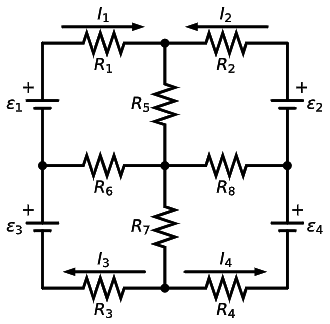
3. Write matrix form of previous linear equations.
4. Write augmented matrix for previous matrix.
5. Write final matrix that represent values for $I_1$, $I_2$, $I_3$, and $I_4$, symbolically.

### part b (take-home)
1. Report image produced by executing following lines of code.
```python
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='schematic.svg') as d:
    d += (R2 := elm.Resistor().label('$R_2$', loc='bottom'))
    d += elm.BatteryCell().down().label('$\epsilon_2$', loc='bottom').label("+", ofst=(-0.4, 0.9))
    d += elm.Resistor().left().label('$R_8$', loc='bottom')
    d += elm.Resistor().up().label('$R_5$')
    d += elm.Dot()
    d += (R1 := elm.Resistor().left().label('$R_1$', loc='bottom'))
    d += elm.BatteryCell().down().label('$\epsilon_1$', loc='top').label("+", ofst=(-0.4, 0.2))
    d += elm.Dot()
    d.push()
    d += elm.Resistor().right().label('$R_6$', loc='bottom')
    d.pop()
    d += elm.BatteryCell().down().reverse().label('$\epsilon_3$', loc='top').label("+", ofst=(0.4, 0.2))
    d += (R3 := elm.Resistor().right().label('$R_3$', loc='bottom'))
    d += elm.Dot()
    d.push()
    d += (R4 := elm.Resistor().right().label('$R_4$', loc='bottom'))
    d += elm.BatteryCell().up().label('$\epsilon_4$', loc='bottom').label("+", ofst=(-0.4, -0.8))
    d += elm.Dot()
    d.pop()
    d += elm.Resistor().up().label('$R_7$', loc='top')
    d += elm.Dot().color('black')
    d += elm.CurrentLabel().at(R1).label('$I_1$')
    d += elm.CurrentLabel().reverse().at(R2).label('$I_2$')
    d += elm.CurrentLabel().at(R3).label('$I_3$')
    d += elm.CurrentLabel().reverse().at(R4).label('$I_4$')
```
2. Write linear equations for $I_1$, $I_2$, $I_3$, and $I_4$ from produced figure.
3. Write matrix form of previous linear equations.
4. Write augmented matrix for previous matrix and code representing the augmented matrix.
5. Find solutions for $I_1$, $I_2$, $I_3$, and $I_4$ using [`numpy.linalg.solve`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) for following values, where $R_i$ is in $\rm \Omega$ and $\varepsilon_i$ is in $\rm V$.

$R_1$ | $R_2$ | $R_3$ | $R_4$ | $R_5$ | $R_6$ | $R_7$ | $R_8$ | $\varepsilon_1$ | $\varepsilon_2$ | $\varepsilon_3$ | $\varepsilon_4$
:-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:
1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 12 | 15 | 16 | 19 

## answers

+ Put your answers of part b below this cell.
+ Write only one answer in one Code cell or in one Markdown cell.
+ There should be **at least five cells (Code cells + Markdown cells)**.
+ Existence of additional Markdown cells for explanation are optional.

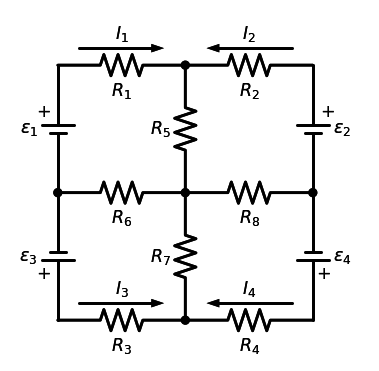

In [1]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='schematic.svg') as d:
 d += (R2 := elm.Resistor().label('$R_2$', loc='bottom'))
 d += elm.BatteryCell().down().label('$\epsilon_2$', loc='bottom').label("+", ofst=(-0.4, 0.9))
 d += elm.Resistor().left().label('$R_8$', loc='bottom')
 d += elm.Resistor().up().label('$R_5$')
 d += elm.Dot()
 d += (R1 := elm.Resistor().left().label('$R_1$', loc='bottom'))
 d += elm.BatteryCell().down().label('$\epsilon_1$', loc='top').label("+", ofst=(-0.4, 0.2))
 d += elm.Dot()
 d.push()
 d += elm.Resistor().right().label('$R_6$', loc='bottom')
 d.pop()
 d += elm.BatteryCell().down().reverse().label('$\epsilon_3$', loc='top').label("+", ofst=(0.4, 0.2))
 d += (R3 := elm.Resistor().right().label('$R_3$', loc='bottom'))
 d += elm.Dot()
 d.push()
 d += (R4 := elm.Resistor().right().label('$R_4$', loc='bottom'))
 d += elm.BatteryCell().up().label('$\epsilon_4$', loc='bottom').label("+", ofst=(-0.4, -0.8))
 d += elm.Dot()
 d.pop()
 d += elm.Resistor().up().label('$R_7$', loc='top')
 d += elm.Dot().color('black')
 d += elm.CurrentLabel().at(R1).label('$I_1$')
 d += elm.CurrentLabel().reverse().at(R2).label('$I_2$')
 d += elm.CurrentLabel().at(R3).label('$I_3$')
 d += elm.CurrentLabel().reverse().at(R4).label('$I_4$')

Persamaan linear untuk $I_1, I_2, I_3,$ dan $I_4$ dari rangkaian pada gambar di atas adalah
$$\tag{1}
\begin{eqnarray}
(R_1+R_5+R_6)I_1+R_5I_2+R_6I_3 = - \varepsilon_1, \newline
R_5I_1+(R_2+R_5+R_8)I_2+R_8I_4 = - \varepsilon_2, \newline
R_6I_1+(R_3+R_6-R_7)I_3-R_7I_4 = - \varepsilon_3, \newline
R_8I_2-R_7I_3+(R_4-R_7+R_8)I_4 = - \varepsilon_4,
\end{eqnarray}
$$

Persamaan (1) dapat dituliskan dalam bentuk matriks

$$\tag{2}
\mathbf{A} \mathbf{x} = \mathbf{b},
$$

dengan

$$\tag{3}
\mathbf{A} = \left[
\begin{array}{cccc}
(R_1+R_5+R_6) & R_5 & R_6 & 0\newline
R_5 & (R_2+R_5+R_8) & 0 & R_8\newline
R_6 & 0 & (R_3+R_6-R_7) & -R_7\newline
0 & R_8 & -R_7 & (R_4-R_7+R_8)
\end{array}
\right]
$$

$$\tag{4}
\mathbf{x} = \left[
\begin{array}{c}
I_1 \newline
I_2 \newline
I_3 \newline
I_4
\end{array}
\right]
$$

and

$$\tag{5}
\mathbf{b} = \left[
\begin{array}{c}
- \varepsilon_1 \newline
- \varepsilon_2 \newline
- \varepsilon_3 \newline
- \varepsilon_4
\end{array}
\right]
$$



Matriks teraugmentasi dari persamaan (2) dapat dituliskan sebagai berikut
$$\tag{6}
\mathbf{M} = [ \mathbf{A} | \mathbf{b} ],
$$

$$\tag{7}
\left[
\begin{array}{cccc|c}
(R_1+R_5+R_6) & R_5 & R_6 & 0 & -\varepsilon_1\newline
R_5 & (R_2+R_5+R_8) & 0 & R_8 & -\varepsilon_2\newline
R_6 & 0 & (R_3+R_6-R_7) & -R_7 & -\varepsilon_3\newline
0 & R_8 & -R_7 & (R_4-R_7+R_8) & -\varepsilon_4
\end{array}
\right]
$$

In [10]:
import numpy as np
a = np.array([[1+5+6,5,6,0],[5,2+5+8,0,8],[6,0,3+6-7,8],[0,8,-7,4-7+8]])
b = np.array([-12,-15,-16,-19])
x = np.linalg.solve(a,b)
print("Hasil perhitungan matriks teraugmentasi pada persamaan 7 menggunakan numpy.linalg.solve memberikan matriks I: ")
print(x)

Hasil perhitungan matriks teraugmentasi pada persamaan 7 menggunakan numpy.linalg.solve memberikan matriks I: 
[-2.26582278  0.2278481   2.34177215 -0.88607595]
